## Problem Type - Regression
Key Performance Indicator - RMSE, MAE, R² Score

In [588]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Collection

In [589]:
df = pd.read_csv('House_Rent_Dataset.csv')

In [590]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


Problem Statement - The data contains Size of the property, number of rooms, bathrooms, city and area type.

Aim - Aim is to predict the rent price based on the input features.

In [591]:
df.shape

(4746, 12)

In [592]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


## Observation - 

1) BHK has normally distributed data
2) Rent has positively or right skewed distribution. It is the output feature.
3) Size has left skewed distribution.
4) Bathroom has normal distribution

## Data Preprocessing And Cleaning

In [593]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

There are no null values in this dataset.

In [594]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [595]:
df.head(2)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner


In [596]:
df.duplicated().sum()

0

There are no duplicates in the dataset.

In [597]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [598]:
df['City'].unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

In [599]:
## Handling Outliers

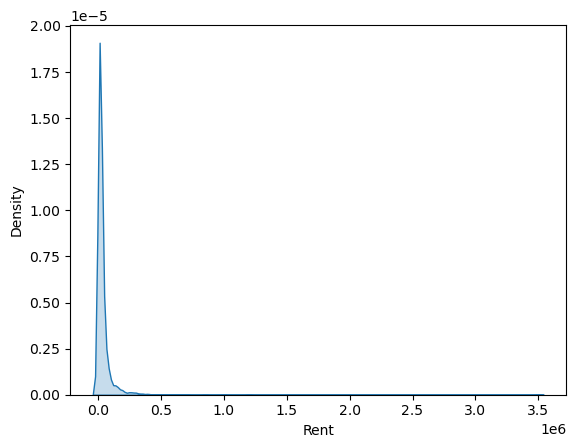

In [600]:
# sns.histplot(data = df, x = 'Rent',kde=True, fill = True )
sns.kdeplot(data=df, x='Rent', fill=True)
plt.show()

The rent price is heavily skewed and contains major outliers.

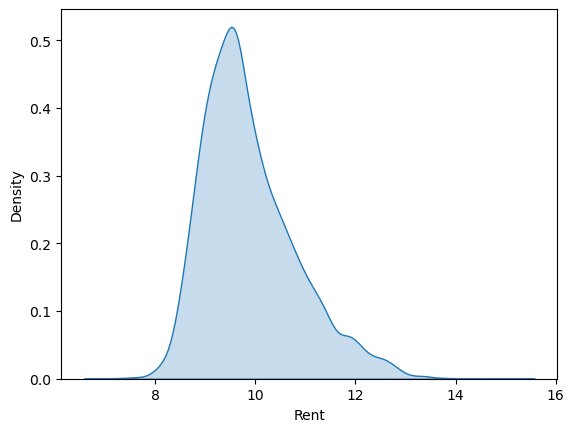

In [601]:
sns.kdeplot( np.log1p(df['Rent']), fill=True)
plt.show()

In [602]:
df_copy = df
df['log_Rent'] = np.log1p(df['Rent'])
df_copy = pd.concat([df, log_Rent], axis=1)
df_copy.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
log_Rent             0
Rent                 0
dtype: int64

In [603]:
df_copy.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,log_Rent,Rent
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,9.210440,9.210440
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,9.903538,9.903538
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,9.741027,9.741027
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,9.210440,9.210440
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,8.922792,8.922792


In [604]:
df_copy['log_Rent'].sort_values(ascending = False)[:5]

1837    15.068274
1001    13.997833
827     13.815512
1329    13.652993
1459    13.458837
Name: log_Rent, dtype: float64

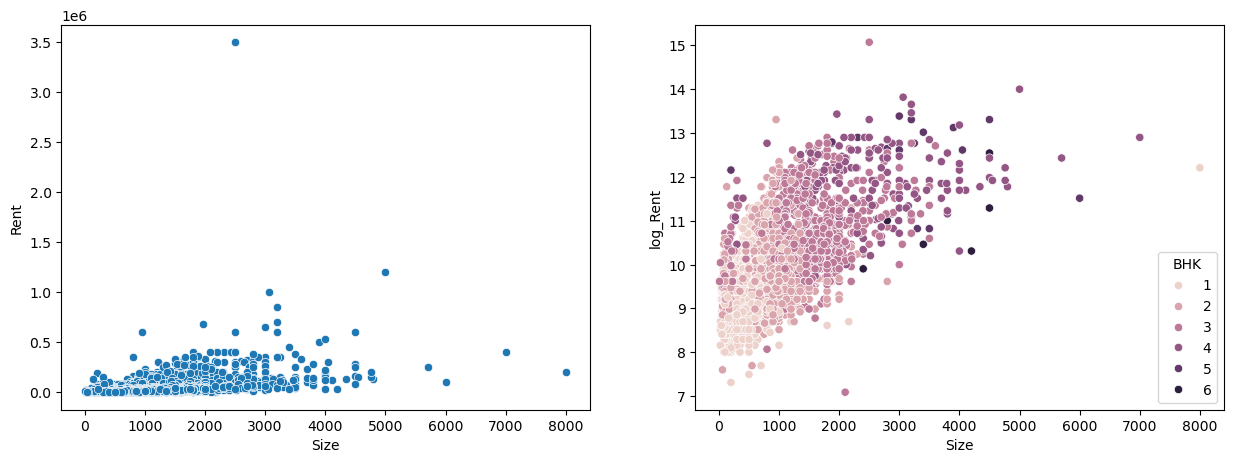

In [605]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.scatterplot(data=df, x='Size', y='Rent')
plt.subplot(1,2,2)
sns.scatterplot(data=df_copy,x='Size', y='log_Rent',hue ='BHK')
plt.show()

The data in the first subplot is heavily skewed and difficult to understand.

The data in the second subplot shows a positive correlation. As size increases , the rent also increases.

In [606]:
highest_value_rent = df['Rent'].sort_values(ascending = False)[:5]
highest_value_rent

1837    3500000
1001    1200000
827     1000000
1329     850000
1459     700000
Name: Rent, dtype: int64

In [607]:
df_copy['log_Rent'].unique()

array([ 9.21044037,  9.90353755,  9.74102744,  8.92279162,  8.85380827,
        8.51739317, 10.16589028, 10.1266711 ,  8.77971129,  8.61268517,
        9.04793908, 10.59665973,  8.6996814 ,  9.30574146,  8.97474461,
        9.10509096,  8.29429961,  8.98732181,  8.57565076,  9.43356392,
        9.61587214,  9.99884319,  9.95232533,  8.88197518,  9.39274526,
        8.43402895, 10.30898599,  8.16080392,  9.6804065 ,  9.58197289,
        9.01201138,  8.81001205,  9.79818259, 10.46313191, 12.10071769,
        9.54688403,  8.26898821,  8.74846363,  9.47278156,  8.82482494,
        8.45553053,  8.41205487,  9.7700133 ,  7.69666708,  9.15915234,
        9.71117626,  9.25922577, 10.81979828,  8.55660619, 10.08585078,
        8.00670085,  8.07121854,  7.31388683,  8.24301947,  8.73246585,
        9.20039104, 10.49476811, 10.04329297,  8.5461693 , 10.02131503,
       10.43414521,  7.49609735,  8.21635833,  8.10198073, 11.00211651,
       11.08215793, 10.71443999, 11.15626481, 11.22525673, 11.98

In [608]:
## Dropping Unrequired Columns

In [609]:
df_copy.drop(['Posted On','Floor','Tenant Preferred','Point of Contact','Rent'], axis=1, inplace = True)

In [610]:
df_copy.head(2)

,BHK,Size,Area Type,Area Locality,City,Furnishing Status,Bathroom,log_Rent
0,2,1100,Super Area,Bandel,Kolkata,Unfurnished,2,9.210440
1,2,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,1,9.903538


In [611]:
df_copy['Area Type'].value_counts()

Area Type
Super Area     2446
Carpet Area    2298
Built Area        2
Name: count, dtype: int64

The data is imbalanced. Super Area and Carpet Area are approximately equal but Built Area is very less.

In [612]:
df_copy = df_copy[df_copy['Area Type']!= 'Built Area']
df_copy['Area Type'].value_counts()

Area Type
Super Area     2446
Carpet Area    2298
Name: count, dtype: int64

In [613]:
df_copy['Furnishing Status'].value_counts()

Furnishing Status
Semi-Furnished    2251
Unfurnished       1814
Furnished          679
Name: count, dtype: int64

The data is imbalanced.

In [614]:
df_copy['Bathroom'].value_counts()

Bathroom
2     2290
1     1473
3      749
4      156
5       60
6       12
7        3
10       1
Name: count, dtype: int64

The data is imbalanced.

In [615]:
df_copy = df_copy[df_copy['Bathroom'] <= 5]
df_copy['Bathroom'].value_counts()

Bathroom
2    2290
1    1473
3     749
4     156
5      60
Name: count, dtype: int64

In [616]:
df['Area Locality'].unique()

array(['Bandel', 'Phool Bagan, Kankurgachi', 'Salt Lake City Sector 2',
       ..., 'BN Reddy Nagar', 'Godavari Homes, Quthbullapur',
       'Manikonda, Hyderabad'], dtype=object)

In [617]:
grouped_locality = df.groupby(['Area Locality', 'City'])['Rent'].mean()
grouped_locality

Area Locality                         City     
 Beeramguda, Ramachandra Puram, NH 9  Hyderabad    200000.000000
 in Boduppal, NH 2 2                  Hyderabad      4700.000000
 in Erragadda, NH 9                   Hyderabad     12000.000000
 in Miyapur, NH 9                     Hyderabad     15000.000000
117 Residency, Chembur East           Mumbai        47000.000000
                                                       ...      
vanamali chs ghatla, Ghatla           Mumbai        52000.000000
venkatapuram                          Bangalore     13500.000000
venkatesa perumal nagar               Chennai        9000.000000
villvam towers tnhb colony            Chennai       15000.000000
whitefield                            Bangalore     57458.333333
Name: Rent, Length: 2240, dtype: float64

Since there are too many localities per city it could result in overfitting so dropping the locality feature is relevant and necessary.

In [618]:
df_copy.drop(['Area Locality'], axis=1, inplace = True)

In [619]:
df_copy.head(1)

,BHK,Size,Area Type,City,Furnishing Status,Bathroom,log_Rent
0,2,1100,Super Area,Kolkata,Unfurnished,2,9.21044


In [620]:
df['BHK'].value_counts()

BHK
2    2265
1    1167
3    1098
4     189
5      19
6       8
Name: count, dtype: int64

## Exploratory Data Analysis

In [621]:
## Creating List of Categorical And Numerical Features

In [622]:
numerical_feature = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']
categorical_feature = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']
print("Numerical Features = ", numerical_feature)
print("Categorical Features = ", categorical_feature)

Numerical Features =  ['BHK', 'Size', 'Bathroom', 'log_Rent']
Categorical Features =  ['Area Type', 'City', 'Furnishing Status']


## Univariate Analysis

In [623]:
## NUMERICAL FEATURES

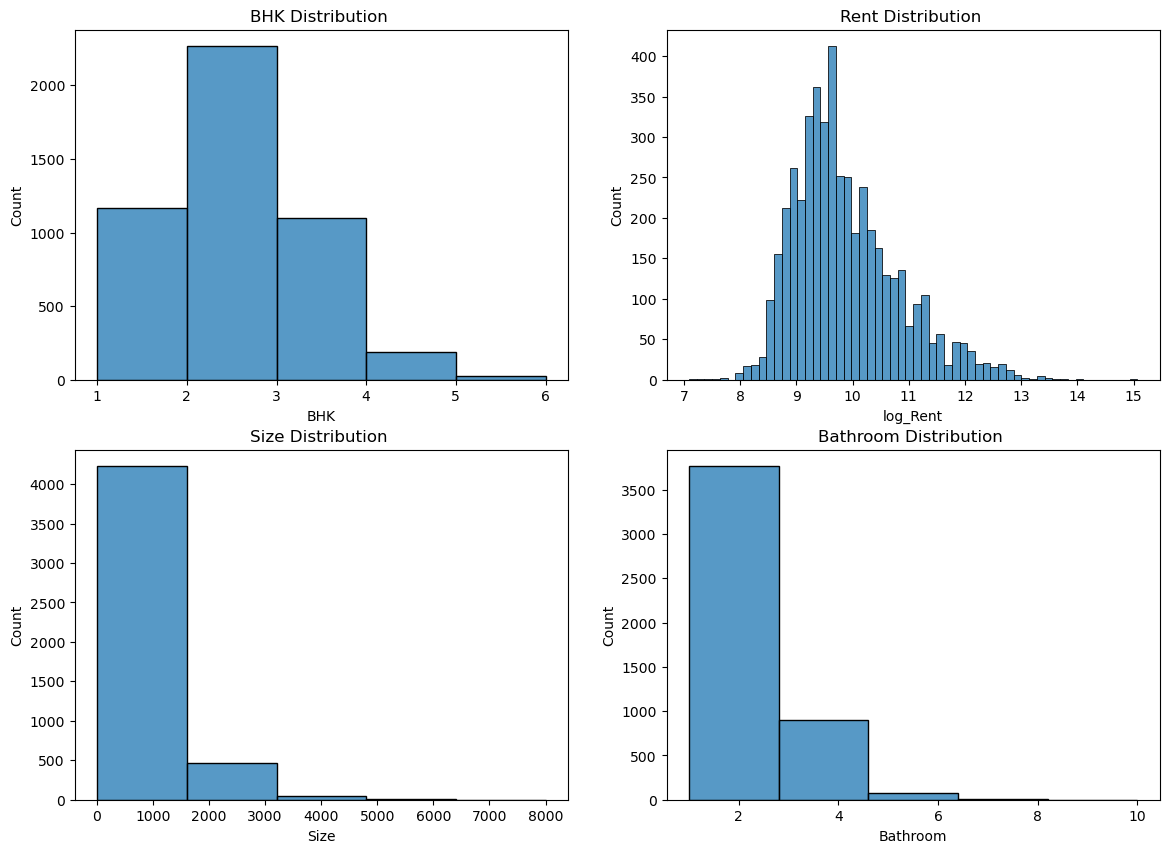

In [624]:
plt.figure(figsize = (14,10))
plt.subplot(2,2,1)
sns.histplot(data= df, x='BHK', bins = 5)
plt.title('BHK Distribution ')

plt.subplot(2,2,2)
sns.histplot(data= df_copy, x='log_Rent')
plt.title('Rent Distribution ')


plt.subplot(2,2,3)
sns.histplot(data= df, x='Size', bins = 5)
plt.title('Size Distribution ', verticalalignment = 'baseline')



plt.subplot(2,2,4)
sns.histplot(data= df, x='Bathroom', bins = 5)
plt.title('Bathroom Distribution ')
plt.show()

In [625]:
df_copy[numerical_feature].corr()

,BHK,Size,Bathroom,log_Rent
BHK,1.000000,0.726856,0.801513,0.594527
Size,0.726856,1.000000,0.726766,0.566001
Bathroom,0.801513,0.726766,1.000000,0.696171
log_Rent,0.594527,0.566001,0.696171,1.000000


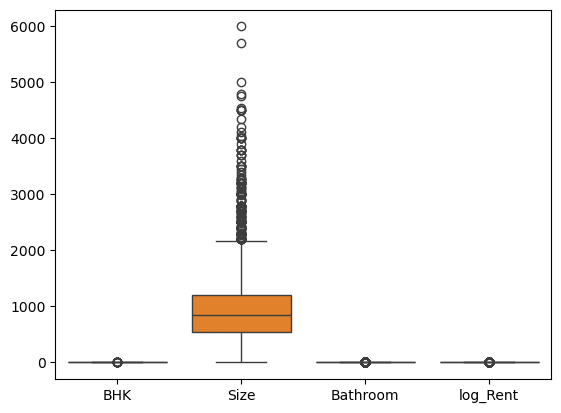

In [626]:
sns.boxplot(data = df_copy)
plt.show()

Significant outliers are present in the features.

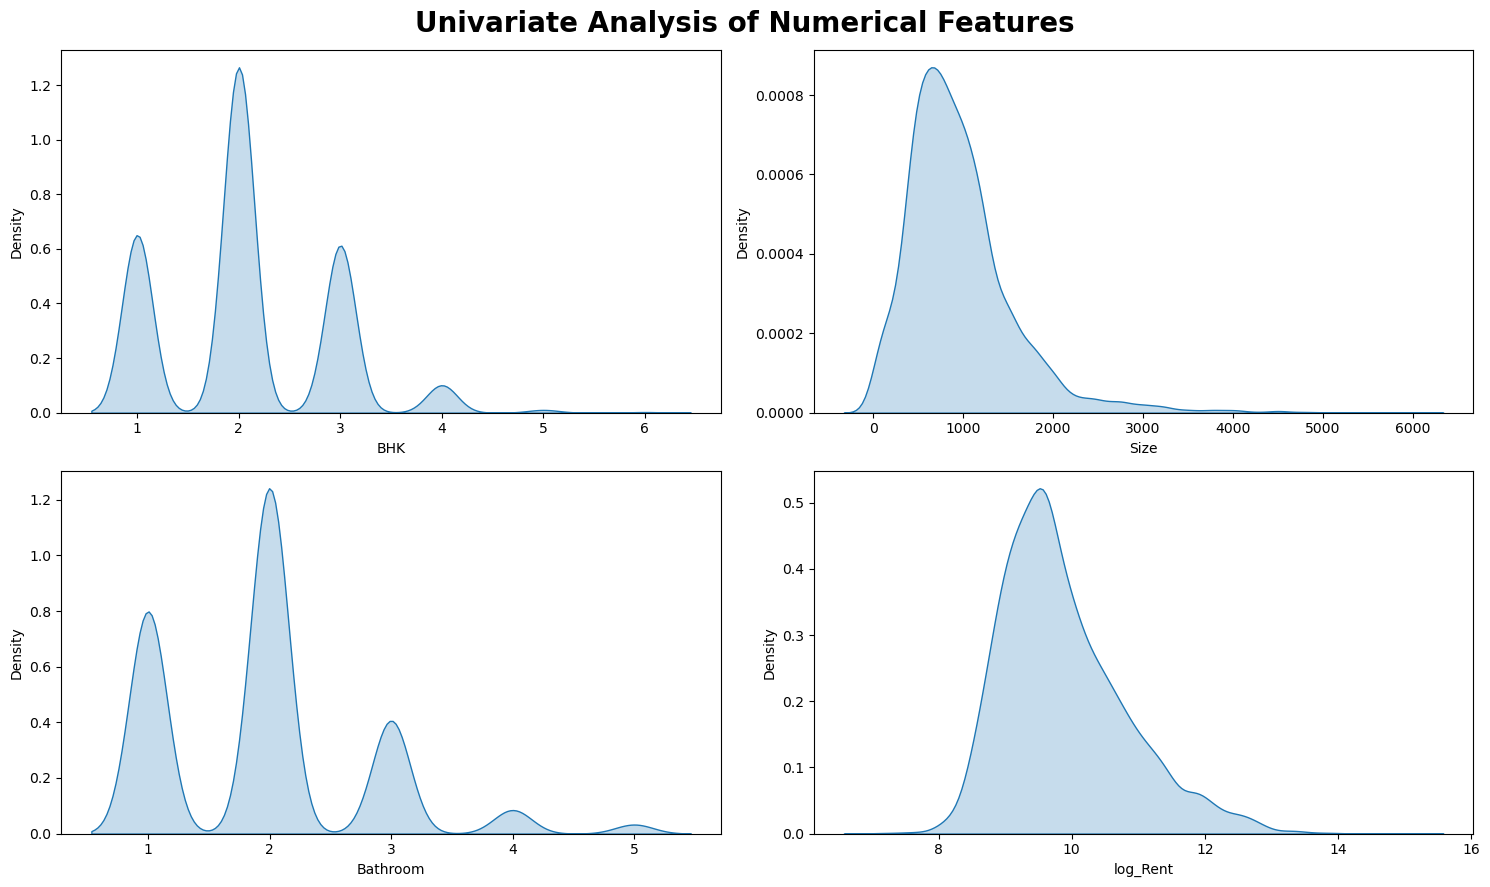

In [627]:
plt.figure(figsize=(15,9))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold')

for i in range(0, len(numerical_feature)):
    plt.subplot(2,2, i+1)
    sns.kdeplot(x=df_copy[numerical_feature[i]],fill=True)
    plt.xlabel(numerical_feature[i])
    plt.tight_layout()
plt.show()

In [628]:
## CATEGORICAL FEATURES

In [629]:
grouped_mean= df.groupby(['City'])['Rent'].mean()
grouped_mean

City
Bangalore    24966.365688
Chennai      21614.092031
Delhi        29461.983471
Hyderabad    20555.048387
Kolkata      11645.173664
Mumbai       85321.204733
Name: Rent, dtype: float64

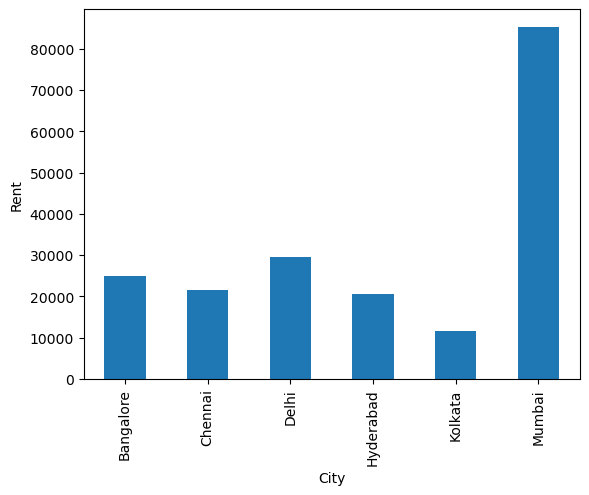

In [630]:
grouped_mean.plot(kind='bar')
plt.ylabel('Rent')
plt.show()

Mumbai has the highest rent as compared to other cities.

Kolkata has the cheapest rent.

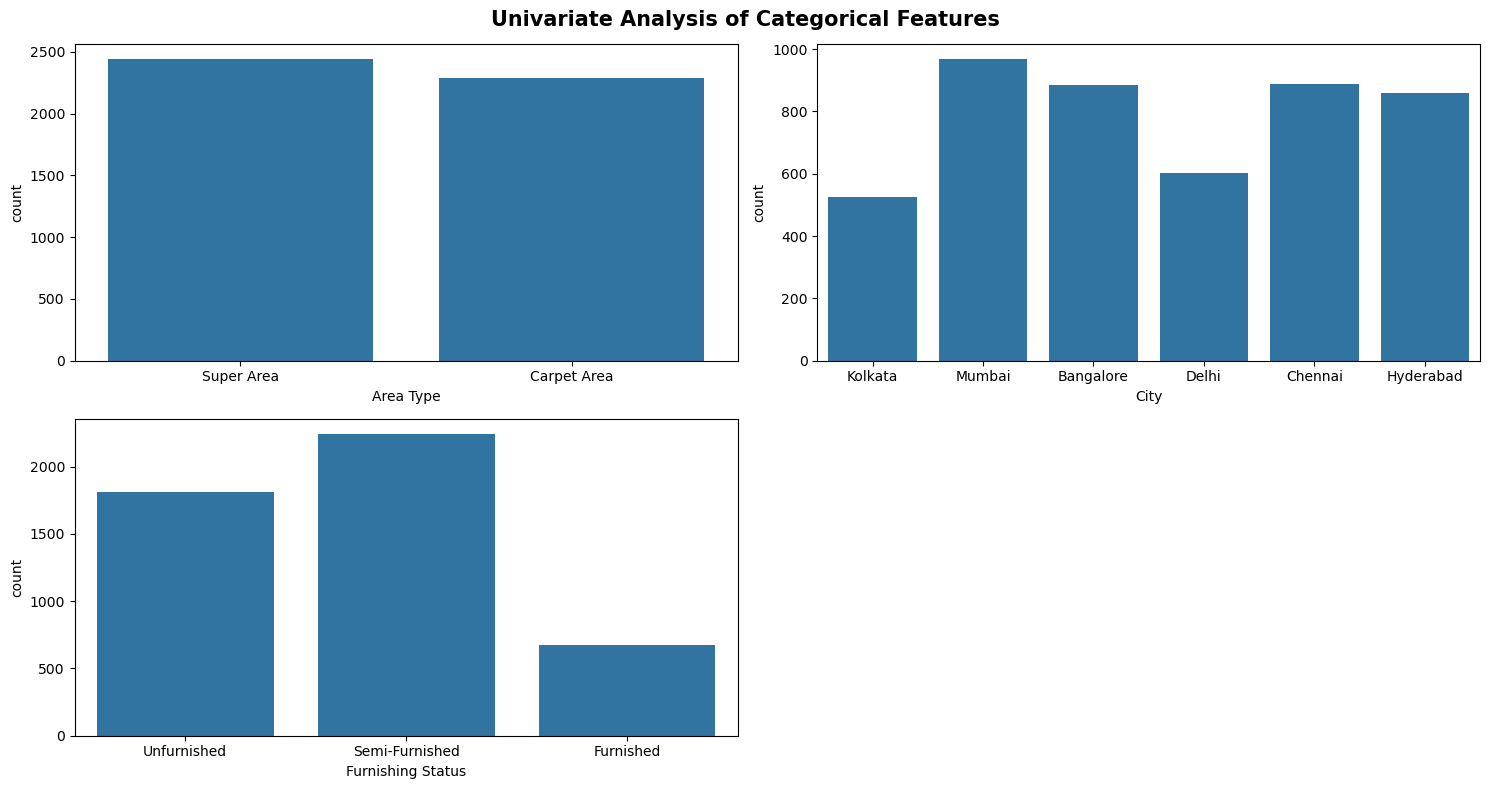

In [631]:
plt.figure(figsize=(15,8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=15, fontweight='bold')

for i in range(0, len(categorical_feature)):
    plt.subplot(2,2, i+1)
    sns.countplot(x=df_copy[categorical_feature[i]],fill=True)
    plt.xlabel(categorical_feature[i])
    plt.tight_layout()
plt.show()

In [632]:
## The data is almost balanced for all Area Type and City.

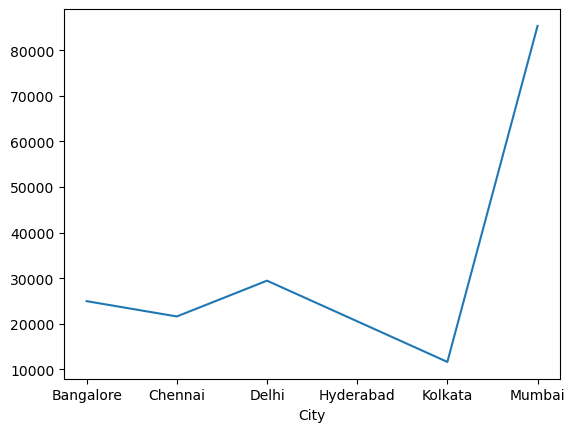

In [633]:
grouped_mean.plot(kind="line")
plt.show()

## Bivariate Analysis

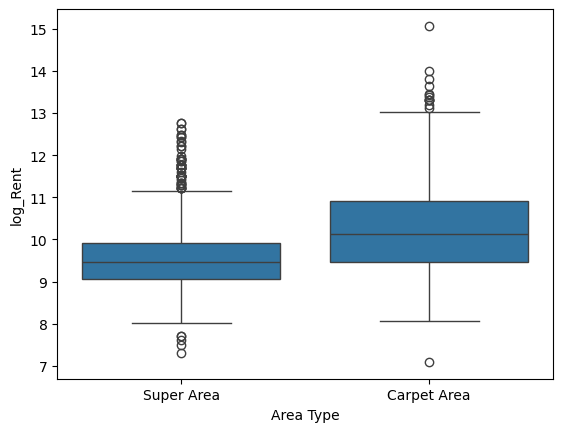

In [634]:
sns.boxplot(data = df_copy, x='Area Type', y='log_Rent')
plt.show()

Significant Outliers are present in Super Area.

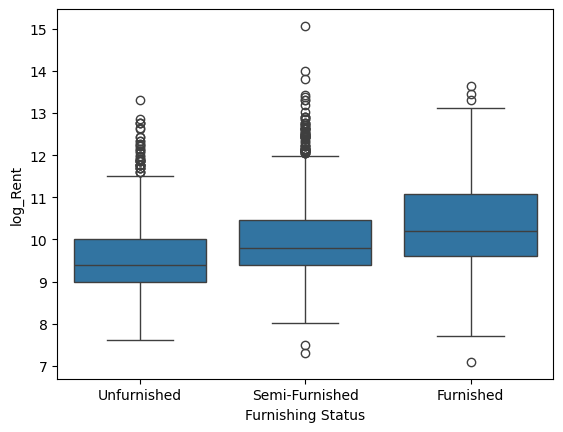

In [635]:
sns.boxplot(data = df_copy, x='Furnishing Status', y='log_Rent')
plt.show()

Significant number of Outliers are present in Unfurnished and Semi furnished properties with respect to rent.

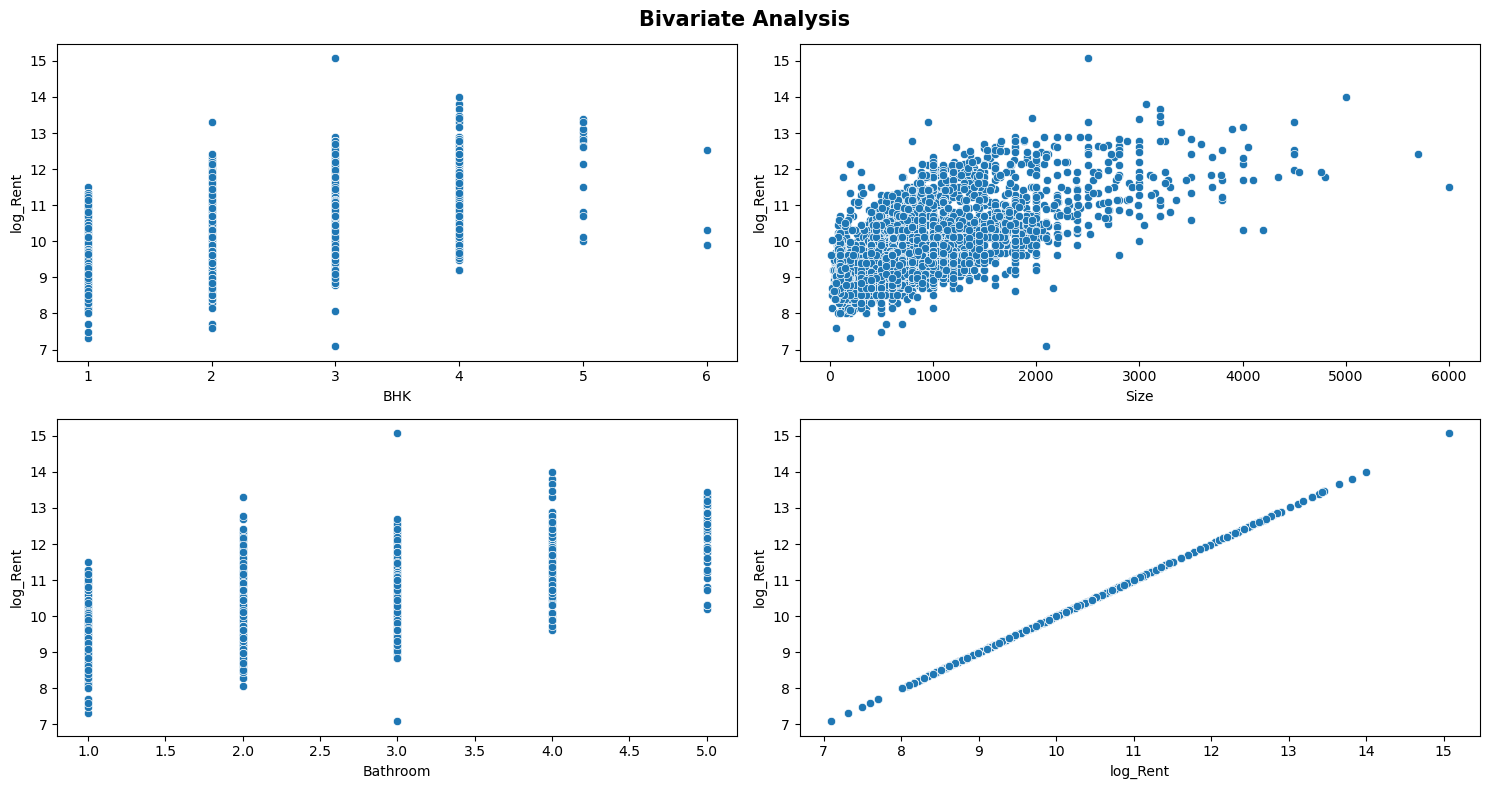

In [636]:
plt.figure(figsize=(15,8))
plt.suptitle('Bivariate Analysis', fontsize=15, fontweight='bold')

for i in range(len(numerical_feature)):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(data=df_copy, x=numerical_feature[i], y='log_Rent')
    plt.xlabel(numerical_feature[i])
    plt.ylabel('log_Rent')
    plt.tight_layout()

plt.show()

## Multivariate Analysis

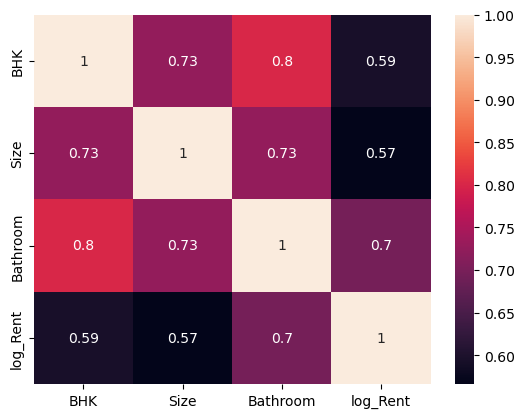

In [637]:
sns.heatmap(data = df_copy[numerical_feature].corr(), annot = True)
plt.show()

## Observation 
1) Bathroom has the highest positive correlation with log_Rent. As the number of bathroom increases, the Rent increases.
2) Similarly Size and BHK also have a positive correlation with rent.
3) However, BHK, Size, and Bathroom are strongly intercorrelated (r > 0.7), which may introduce multicollinearity in regression models.

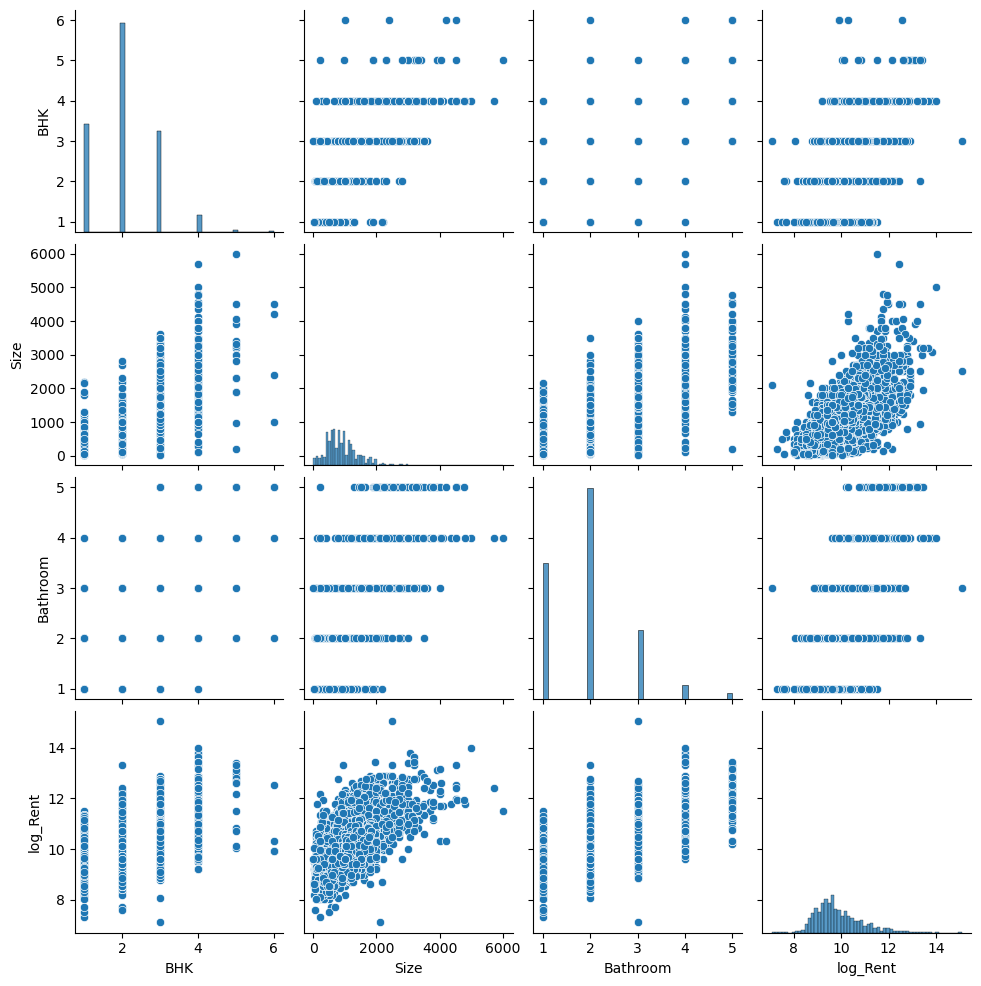

In [638]:
sns.pairplot(data=df_copy)
plt.show()

## Feature Engineering

In [639]:
df_copy.head()

,BHK,Size,Area Type,City,Furnishing Status,Bathroom,log_Rent
0,2,1100,Super Area,Kolkata,Unfurnished,2,9.210440
1,2,800,Super Area,Kolkata,Semi-Furnished,1,9.903538
2,2,1000,Super Area,Kolkata,Semi-Furnished,1,9.741027
3,2,800,Super Area,Kolkata,Unfurnished,1,9.210440
4,2,850,Carpet Area,Kolkata,Unfurnished,1,8.922792


Due to the presence of categorical features, we'll have to perform data encoding.

In [640]:
from sklearn.preprocessing import OneHotEncoder
encoding = OneHotEncoder()

In [641]:
encoded=encoding.fit_transform(df_copy[['Area Type', 'City','Furnishing Status']]).toarray()

In [642]:
encoded_df = pd.DataFrame(encoded, columns=encoding.get_feature_names_out())

In [643]:
encoded_df.head()

,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [644]:
encoded_df.index = df_copy.index
df_copy = pd.concat([df_copy, encoded_df], axis=1)

In [645]:
df_copy.head(2)

,BHK,Size,Area Type,City,Furnishing Status,Bathroom,log_Rent,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished
0,2,1100,Super Area,Kolkata,Unfurnished,2,9.210440,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2,800,Super Area,Kolkata,Semi-Furnished,1,9.903538,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [646]:
df_copy.drop(['Area Type','City','Furnishing Status'], axis=1, inplace = True)

In [647]:
df_copy.head(1)

,BHK,Size,Bathroom,log_Rent,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished
0,2,1100,2,9.21044,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## Model Building

In [648]:
df_copy.head(1)

,BHK,Size,Bathroom,log_Rent,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished
0,2,1100,2,9.21044,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [649]:
X = df_copy.drop('log_Rent', axis=1)  # Independent Features
y = df_copy['log_Rent']   ## Dependent Feature

In [650]:
y.head()

0    9.210440
1    9.903538
2    9.741027
3    9.210440
4    8.922792
Name: log_Rent, dtype: float64

In [651]:
from sklearn.model_selection import train_test_split

In [652]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [653]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((3782, 14), (3782,), (946, 14), (946,))

In [654]:
## FEATURE SCALING

In [655]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [656]:
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
X_train

array([[-0.10849666, -0.26780304,  1.23336046, ..., -0.40856308,
         1.04103149, -0.77798661],
       [ 1.10911272,  1.22843891,  1.23336046, ...,  2.44760247,
        -0.96058574, -0.77798661],
       [ 2.32672211,  3.22342817,  2.41786255, ...,  2.44760247,
        -0.96058574, -0.77798661],
       ...,
       [-0.10849666, -0.64186353,  0.04885836, ..., -0.40856308,
         1.04103149, -0.77798661],
       [-1.32610604, -0.26780304, -1.13564373, ..., -0.40856308,
        -0.96058574,  1.28536917],
       [-1.32610604, -0.84967491,  0.04885836, ..., -0.40856308,
         1.04103149, -0.77798661]])

In [657]:
X_test

array([[-0.10849666, -0.26780304,  0.04885836, ..., -0.40856308,
         1.04103149, -0.77798661],
       [-0.10849666, -0.5171767 ,  0.04885836, ..., -0.40856308,
        -0.96058574,  1.28536917],
       [-1.32610604, -0.76655036, -1.13564373, ..., -0.40856308,
         1.04103149, -0.77798661],
       ...,
       [-0.10849666, -0.12150383,  0.04885836, ...,  2.44760247,
        -0.96058574, -0.77798661],
       [ 1.10911272,  0.64656704,  1.23336046, ...,  2.44760247,
        -0.96058574, -0.77798661],
       [-0.10849666, -0.54211407,  0.04885836, ..., -0.40856308,
        -0.96058574,  1.28536917]])

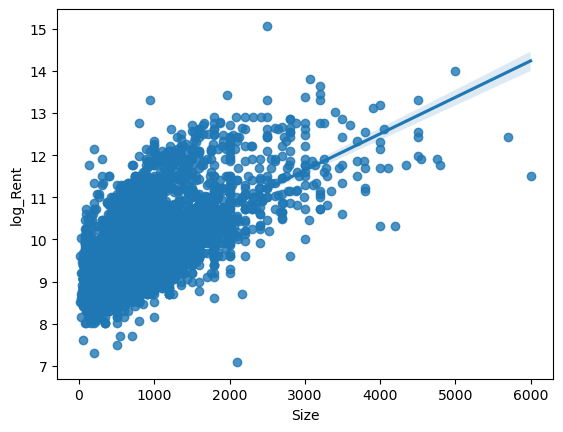

In [658]:
sns.regplot(x='Size', y='log_Rent', data=df_copy)
plt.show()

There’s a positive relationship between Size and log_Rent, though the dispersion increases with Size. Outliers in large apartments might result in wrong predictions and need to be reviewed.

## Model Training

In [659]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [660]:
regression

LinearRegression()

In [661]:
regression.fit(X_train, y_train)

LinearRegression()

In [662]:
regression.coef_

array([ 1.54511796e-01,  2.86873854e-01,  1.84090751e-01, -6.57523445e+09,
       -6.57523445e+09, -2.20688145e+12, -2.22568123e+12, -1.85965737e+12,
       -2.17665786e+12, -1.75416930e+12, -2.27528936e+12, -5.40230528e+11,
       -7.70870576e+11, -7.47805027e+11])

In [663]:
regression.intercept_

9.880558744174644

## Prediction for Test Data

In [664]:
y_pred = regression.predict(X_test)

In [665]:
y_pred

array([ 9.35137852,  9.80751845,  8.99468907, 10.1864247 , 11.17144688,
       10.81475743, 11.00372227,  9.54180821, 11.04766759,  9.76006993,
        9.69741103,  8.53578993,  9.90582188,  9.70888564, 10.66078993,
        9.68707188, 10.37758681,  9.54482314,  9.10024306,  9.24175938,
       11.69952306,  8.98622939, 10.20790907,  9.64190587, 10.18682774,
       11.48077306,  9.88149306, 10.46563634,  9.64092931,  9.68707188,
       11.31378087,  9.09332188,  9.63922032, 10.76006993,  9.0614247 ,
       10.7086415 , 11.76495274,  9.64955947,  9.46758946,  9.57183751,
        9.69252822,  9.38702306,  9.69634923, 11.0122672 ,  9.70831212,
       11.26690587,  9.64703282,  9.86041173,  9.41738173, 10.1528922 ,
        9.16558751, 10.13458165,  8.69789931,  9.42779454,  9.18902501,
        9.04840001,  9.17543837, 11.6853629 ,  9.65655431,  9.42193516,
        9.57867345,  8.88482579, 10.36749181,  9.35137852,  9.4376454 ,
        8.94716689, 10.68422743, 11.06060704, 10.13897618,  9.54

In [666]:
y_test

3977     9.305741
2924     9.472782
1745     8.517393
2985    10.203629
1502    11.026809
          ...    
1055    11.775297
3013     8.699681
1256    11.050906
871     12.206078
763     10.887456
Name: log_Rent, Length: 946, dtype: float64

## Performance Metrics

In [667]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mean_square = mean_squared_error(y_test, y_pred)
mean_absolute = mean_absolute_error(y_test, y_pred)
root_mean = np.sqrt(mean_square)
print("Mean sqaured error = ", mean_square)
print("Mean absolute error = ", mean_absolute)
print("Root mean sqaured error = ", root_mean)

Mean sqaured error =  0.17421067730594722
Mean absolute error =  0.3065367154130477
Root mean sqaured error =  0.4173855259899979


In [668]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.791311828538668


In [669]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7881736605467683

## CONCLUSION 

The linear regression model explains about 79% of the variation in rent prices, with an average error of 0.30 log units and a typical prediction error (RMSE) of 0.41 log units.